In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# 待研究的股票

In [ ]:
# 紫金矿业 江西铜业 铜陵有色 西部矿业 云南铜业
# 601899 600362 000630 601168 000878

# 潞安环能 山西焦煤 永泰能源 淮北矿业 华阳股份
# 601699 000983 600157 600985 600348

# 宝钢股份 包钢股份 华菱钢铁 首钢股份 鞍钢股份
# 600019 600010 000932 000959 000898

# 中国石油 中国石化 荣盛石化 恒力石化 东方盛虹
# 601857 600028 002493 600346 000301

# 三友化工 吉林化纤 新乡化纤 恒天海龙 南京化纤
# 600409 000420 000949 000677 600889

# 宝丰能源 鲁西化工 华谊集团 诚志股份 江苏索普
# 600989 000830 600623 000990 600746

# 赛轮轮胎 玲珑轮胎 三角轮胎 通用股份 贵州轮胎
# 601058 601966 601163 601500 000589

# 中粮糖业 冠农股份 南宁糖业 华资实业
# 600737 600251 000911 600191

# 大北农 天康生物 唐人神 禾丰股份 傲农生物
# 002385 002100 002567 603609 603363

# 百隆东方 鲁泰 A 华孚时尚 孚日股份 华茂股份
# 601339 000726 002042 002083 000850

# 先储存股票数据

In [62]:
metal = pd.read_csv("stocks/metal.csv")
metal['Stkcd'] = metal['Stkcd'].astype(str).str.zfill(6)

coal = pd.read_csv("stocks/coal.csv")
coal['Stkcd'] = coal['Stkcd'].astype(str).str.zfill(6)

nonferrous = pd.read_csv("stocks/nonferrous.csv")
nonferrous['Stkcd'] = nonferrous['Stkcd'].astype(str).str.zfill(6)

stock_codes = ["601899", "600362", "000630", "601168", "000878"]

# 把所有需要的stock数据储存到一个list中，list每个元素都是一个dataframe

In [63]:
dfs = []
stock_df = []
stock_codes = ["601899", "600362", "000630", "601168", "000878"]
for code in stock_codes:
    df_metal = metal[metal["Stkcd"] == code]
    dfs.append(df_metal)
    df_coal = coal[coal["Stkcd"] == code]
    dfs.append(df_coal)
    df_nonferrous = nonferrous[nonferrous["Stkcd"] == code]
    dfs.append(df_nonferrous)
    df = pd.concat(dfs)
    stock_df.append(df)



# 这里以AU9999为示例。
* 每个sotck_df的循环，得到的是显著的index（index对应时间）
* 最后一步把用set处理index，得到公共显著的时间段。

In [64]:
au = pd.read_csv("futures/CU9999.XSGE.csv")
au['date'] = pd.to_datetime(au['date'])
au = au[au.date>='2019-05-01']
sig_col = []
for idx, df in enumerate(stock_df):
    df['Trddt'] = pd.to_datetime(df['Trddt'])
    df = df[df.Trddt>='2019-05-01']
    df.rename(columns={"Trddt": "date"}, inplace=True)
    merged_df = pd.concat([au['date'], df['date']])
    unique_times = merged_df.drop_duplicates()
    unique_times[~unique_times.isin(au['date']) | ~unique_times.isin(df['date'])]
    p_value_list = []

    unique_times_df1 = set(au['date'])
    unique_times_df2 = set(df['date'])
    common_times = list(unique_times_df1.intersection(unique_times_df2))
    df1_common = au[au['date'].isin(common_times)]
    df2_common = df[df['date'].isin(common_times)]
    merged_df = pd.merge(df1_common, df2_common, on='date', suffixes=('_df1', '_df2'))
    data = merged_df[['close', 'Clsprc']]

    num_days = len(data)

    window_size = 30
    for i in range(num_days - window_size + 1):
        window_start = i
        window_end = i + window_size
        window_data = data.iloc[window_start:window_end]
        model = VAR(window_data[['close', 'Clsprc']])
        results = model.fit()
        p_values = results.pvalues
        
        p_value_list.append(np.array(p_values['close']))
        
    significant_columns = [i for i, arr in enumerate(p_value_list) if all(arr < 0.05)]
    print(len(significant_columns))
    sig_col.append(significant_columns)


/var/folders/c3/26zrxx711v37chxll893hxgm0000gn/T/ipykernel_4422/412015709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Trddt": "date"}, inplace=True)


107


/var/folders/c3/26zrxx711v37chxll893hxgm0000gn/T/ipykernel_4422/412015709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Trddt": "date"}, inplace=True)


9


/var/folders/c3/26zrxx711v37chxll893hxgm0000gn/T/ipykernel_4422/412015709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Trddt": "date"}, inplace=True)


35


/var/folders/c3/26zrxx711v37chxll893hxgm0000gn/T/ipykernel_4422/412015709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Trddt": "date"}, inplace=True)


0


/var/folders/c3/26zrxx711v37chxll893hxgm0000gn/T/ipykernel_4422/412015709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Trddt": "date"}, inplace=True)


1


In [65]:
common_indices = set(sig_col[0])  # 将第一个列表的索引转换为集合

for indices in sig_col[1:]:
    common_indices.intersection_update(indices)
    
common_indices

set()

# 一些VAR拟合示例

Selected lag order: 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Apr, 2024
Time:                     22:30:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.493820
Nobs:                     1189.00    HQIC:                 -0.509797
Log likelihood:          -3059.42    FPE:                   0.594842
AIC:                    -0.519459    Det(Omega_mle):        0.591852
--------------------------------------------------------------------
Results for equation close
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.777775         0.981462            0.792           0.428
L1.close          0.998596         0.003052          327.244           0.000
L1.Clsprc        -0.001102         0.041892           

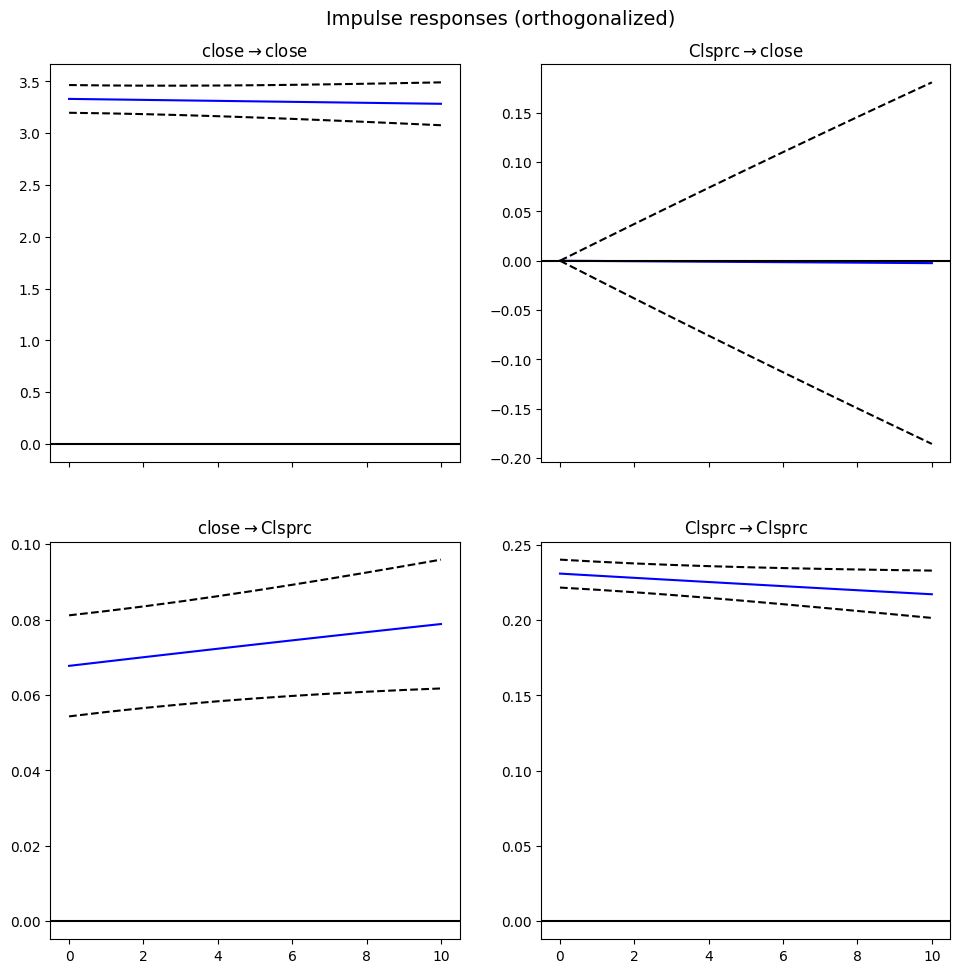

In [45]:
lag_order = model.select_order(15)
print(f"Selected lag order: {lag_order.selected_orders['aic']}")
model_fitted = model.fit(maxlags=lag_order.selected_orders['aic'])
print(model_fitted.summary())

irf = model_fitted.irf(10) # 10期冲击响应
irf.plot(orth=True) # 正交化冲击响应图
plt.show()

# DTW尝试

In [59]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
df1 = np.array(au['close']).reshape(-1, 1)
df2 = np.array(df['Clsprc']).reshape(-1, 1)

distance, path = fastdtw(df1, df2, dist=euclidean)

print("DTW Distance:", distance)
print("Alignment Path:", path)

DTW Distance: 462482.2700000004
Alignment Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (